# Práctica 1: Aprendizaje automático

__Fecha de entrega: 9 de marzo de 2022__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 3 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

## Apartado 3: Regresión

__Número de grupo: 11__

__Nombres de los estudiantes: Aitor Esteban y Edurne Ruiz__

En este notebook trabajaremos con un conjunto de datos tomado del repositorio de la Universidad de California Irvine. En concreto, se trata de un conjunto de datos sobre distintos vinos del norte de Portugal (vinho verde)  que puedes encontrar [aquí](https://archive.ics.uci.edu/ml/datasets/wine+quality). 

El objetivo es modelar la calidad del vino (con un valor de 0 a 10) en base a variables que reflejan sus propiedades físicas y químicas. En concreto, las propiedades son las siguientes:
- fixed acidity
- volatile acidity
- citric acid
- residual sugar
- chlorides
- free sulfur dioxide
- total sulfur dioxide
- density
- pH
- sulphates
- alcohol 

De cara a la memoria que vas a realizar puedes investigar sobre estas propiedades para explicar mejor qué miden y cómo afectan al vino. 

La calidad del vino es una variable que toma valores entre 0 y 10. 

Para modelar la relación entre la calidad del vino y sus propiedades usaremos una red neuronal. 

### 1) Descripción de los datos

Carga el fichero de datos `calidad_vinos.csv` en un dataframe. 

Describe el conjunto de datos e identifica aquella variable que tiene unos valores extremos más acusados con respecto a la media, y aquella que está más concentrada en torno a la media. Reflexiona sobre la posible influencia de estas variables a la hora de entrenar el perceptrón multicapa.


Estudia la distribución de la calidad del vino en el conjunto de datos.

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('calidad_vinos.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [2]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


Observamos las distribuciones de las variables dadas y observamos que la variable alcohol tiene una media de 10.422 y una desviaión típica baja respecto de la media. Por ello, los valores de esta variable están concentrados alrededor de la media. Vemos que el minimo es 8,4 y el máximo 14.9 y el estadístico que deja el 50% de los datos a la izquierda en la distribución es 10.2 (similar a la media). Sin emmbargo la variable density es en la que más se observa que los valores están concentrados respecto a la media. La desviación típica es muy pequeña (0.001887) respecto a la media que es 0.996747. Observamos que todos los valores de los estadístivos están entorno al 0.99.

Nos famos también cuenta que las variables free sulfur dioxide y total sulfur dioxide son las variables con más desviación típica respecto a la media por lo que son también las variables con los valores extremos más acusados con respecto a esta. Por ejemplo, la media de total sulfur dioxide es 46.46, el minimo es 6 y el máximo 289.

Estas variables, por tanto, aportan poca información al perceptrón multicapa a la hora de entrenar. Sin embargo el perceptrón multicapa es capaz de tratar con variables poco relevantes ya que les acabará asignando peso cero y su arquitectura no será necesariamente más compleja. Sin embargo, variables irelevantes hacen que sean necesarios más datos de entrenamiento

<AxesSubplot:>

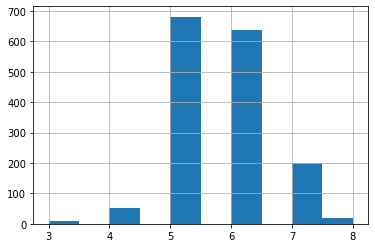

In [3]:
df.quality.hist()

En este gráfico observamos la distribución de la calidad del vino en el conjunto de datos dado. Vemos que la mayoría de los vinos tienen calidad 5 o 6. Es una mayoría amplia respecto a la siguiente calidad con más ejemplos que es 7. Vemos también que no hay datos con calidades 0,1,2,9 o 10.

### 2) Selección de variables

Calcula los coeficientes de correlación de Pearson entre la variable de salida y el resto de variables. Crea un nuevo dataframe que contenga la calidad del vino y las variables que estén más correlacionadas con esa variable (estableciendo para ello un valor umbral que consideres adecuado).

In [4]:
# buscamos las variables más correladas con la variable a predecir (quality)
correl=df.corr()
correl['quality']

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

Observamos que la variable alcohol es la que más correlación tiene con la variable objetivo, seguida de volatile acidity. Vamos a utilizar sólamente las variables más correlacionadas con quality por lo que establecemos 0.15 como umbral y así nos quedamos más o menos con la mitad de las variables.

In [5]:
correl[abs(correl['quality']) > 0.15]['quality']

volatile acidity       -0.390558
citric acid             0.226373
total sulfur dioxide   -0.185100
density                -0.174919
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

In [6]:
df_nuevo = df[['volatile acidity','citric acid','total sulfur dioxide','density','sulphates','alcohol','quality']]
df_nuevo

,volatile acidity,citric acid,total sulfur dioxide,density,sulphates,alcohol,quality
0,0.700,0.00,34.0,0.99780,0.56,9.4,5
1,0.880,0.00,67.0,0.99680,0.68,9.8,5
2,0.760,0.04,54.0,0.99700,0.65,9.8,5
3,0.280,0.56,60.0,0.99800,0.58,9.8,6
4,0.700,0.00,34.0,0.99780,0.56,9.4,5
...,...,...,...,...,...,...,...
1594,0.600,0.08,44.0,0.99490,0.58,10.5,5
1595,0.550,0.10,51.0,0.99512,0.76,11.2,6
1596,0.510,0.13,40.0,0.99574,0.75,11.0,6
1597,0.645,0.12,44.0,0.99547,0.71,10.2,5


### 3) Normalización

Decide si debes o no normalizar los datos de entrada y/o de salida. En caso afirmativo elige razonadamente entre escalarlos o estandarizarlos.


Cuando trabajamos con redes neuronales suele ser una buena idea reescalar los datos para facilitar que el entrenamiento converja más rápidamente. También evita "mínimos locales" en la optimización del error. Además, los datos no tienen una distribución original normal ni similar por lo que escalamos en vez de estandarizar.

In [7]:
from sklearn.preprocessing import MinMaxScaler

# Normalizamos los datos escalándolos al intervalo [0,1]
scaler = MinMaxScaler()
scaler.fit(df_nuevo[['volatile acidity', 'citric acid', 'total sulfur dioxide', 'density','sulphates','alcohol']])
df_nuevo[['volatile acidity_s', 'citric acid_s', 'total sulfur dioxide_s', 'density_s','sulphates_s','alcohol_s']] = scaler.transform(df_nuevo[['volatile acidity', 'citric acid', 'total sulfur dioxide', 'density','sulphates','alcohol']]) # Lo almacenamos en el dataset original
df_nuevo

<ipython-input-7-fc30c3e3e6da>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nuevo[['volatile acidity_s', 'citric acid_s', 'total sulfur dioxide_s', 'density_s','sulphates_s','alcohol_s']] = scaler.transform(df_nuevo[['volatile acidity', 'citric acid', 'total sulfur dioxide', 'density','sulphates','alcohol']]) # Lo almacenamos en el dataset original
C:\Users\aitor\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, va

,volatile acidity,citric acid,total sulfur dioxide,density,sulphates,alcohol,quality,volatile acidity_s,citric acid_s,total sulfur dioxide_s,density_s,sulphates_s,alcohol_s
0,0.700,0.00,34.0,0.99780,0.56,9.4,5,0.397260,0.00,0.098940,0.567548,0.137725,0.153846
1,0.880,0.00,67.0,0.99680,0.68,9.8,5,0.520548,0.00,0.215548,0.494126,0.209581,0.215385
2,0.760,0.04,54.0,0.99700,0.65,9.8,5,0.438356,0.04,0.169611,0.508811,0.191617,0.215385
3,0.280,0.56,60.0,0.99800,0.58,9.8,6,0.109589,0.56,0.190813,0.582232,0.149701,0.215385
4,0.700,0.00,34.0,0.99780,0.56,9.4,5,0.397260,0.00,0.098940,0.567548,0.137725,0.153846
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,0.600,0.08,44.0,0.99490,0.58,10.5,5,0.328767,0.08,0.134276,0.354626,0.149701,0.323077
1595,0.550,0.10,51.0,0.99512,0.76,11.2,6,0.294521,0.10,0.159011,0.370778,0.257485,0.430769
1596,0.510,0.13,40.0,0.99574,0.75,11.0,6,0.267123,0.13,0.120141,0.416300,0.251497,0.400000
1597,0.645,0.12,44.0,0.99547,0.71,10.2,5,0.359589,0.12,0.134276,0.396476,0.227545,0.276923


### 4) Entrenamiento y selección

Crea dos redes neuronales de tipo Perceptrón Multicapa:
- La primera con una capa oculta de 250 neuronas
- La segunda con varias capas ocultas entre las que debes distribuir 250 neuronas, como te parezca

Asegúrate de que no salen warnings durante el entrenamiento indicando que no se ha alcanzado la convergencia durante el entrenamiento (para arreglarlo basta con poner un número de max_iter suficientemente grande).

En la configuración del perceptrón debes usar validación cruzada y explorar varios valores para el parámetro `alpha` que controla el coeficiente de regularización L2.

Para elegir el valor adecuado de dicho coeficiente pinta la curva de aprendizaje para cada perceptrón. En la curva debes pintar una línea que represente el error medio de las distintas particiones de validación y un área sombreada que represente la desviación típica. 

Una vez tengas la curva de aprendizaje: 
  - Identifica las diferencias de comportamiento entre ambos perceptrones, razona o especula sobre por qué se dan. ¿Hay alguno que domine al otro? ¿Es el comportamiento de uno más volátil que el del otro?
  - Determina de manera razonada con qué perceptrón te quedas y el valor óptimo del parámetro de regularización.


De todos los parámetros que podemos configurar en la red neuronal (capas, neuronas, funciones de activación, regulación, tasa de aprendizaje, ...) nosotros sólo vamos optimizar el coeficiente de regularización.

Nosotros vamos a utilizar primero una red con una capa oculta con 250 neuronas, función de activación ReLU, regularización L2, tamaño de mini-batch 100, tasa de aprendizaje 0.1, y máximo de 500 iteraciones a los datos (epochs).

In [8]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np

cv_scores_mean1=[]
cv_scores_std1=[]

# Entrenar y validar distintas configuraciones
regul_param_range = 10.0 ** -np.arange(1, 7) # [0.1, 0.01, ..., 0.0000001]
for regul_param in regul_param_range:
    # Aumentamos el parámetro max_iter hasta que converja
    mlp1=MLPRegressor(hidden_layer_sizes=(250, ), activation='relu', solver='adam', alpha=regul_param, batch_size=100, 
             learning_rate='constant', learning_rate_init=0.001, max_iter=500, random_state=333)
    
    # El error es neg_mean_squared_error el MSE en negativo!! Más pequeño peor.
    scores1 = cross_val_score(mlp1, df_nuevo, df_nuevo.quality.ravel(), cv=5, scoring='neg_mean_squared_error')
    
    cv_scores_mean1.append(scores1.mean())
    cv_scores_std1.append(scores1.std())

cv_scores_mean1, cv_scores_std1

([-0.0006968517048022493,
  -0.0006911220141925872,
  -0.0011721907641174532,
  -0.0006234552743945162,
  -0.0008620410633446748,
  -0.0009512557424526376],
 [0.0006271877980455616,
  0.0003648733403356297,
  0.00034698520965626843,
  0.00016108183111990848,
  0.0004186500798493707,
  0.0004878674185071882])

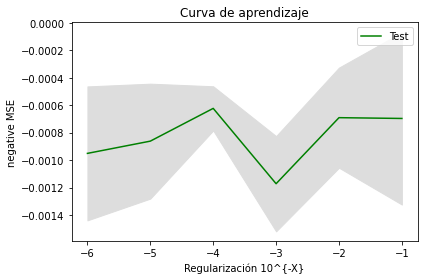

In [9]:
import matplotlib.pyplot as plt

# Dibujamos la línea de la exactitud media en las partes de test
plt.plot(np.log10(regul_param_range), cv_scores_mean1, color="g", label="Test")

# Dibujamos la banda de la desviación típica
lower_limit1 = np.array(cv_scores_mean1) - np.array(cv_scores_std1)
upper_limit1 = np.array(cv_scores_mean1) + np.array(cv_scores_std1)
plt.fill_between(np.log10(regul_param_range), lower_limit1, upper_limit1, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Regularización 10^{-X}"), plt.ylabel("negative MSE"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

Podemos obsevar un comportamiento bastante inestable para este parámetro en cuanto al error medio. En cuanto a la desviación típica observamos en 𝛼=10−4 es pequeña y además en este valor se minimiza el error (en valor absoluto).

A continuación a utilizar una red con 5 capas ocultas con 50 neuronas cada una (en total 250), función de activación ReLU, regularización L2, tamaño de mini-batch 100, tasa de aprendizaje 0.1, y máximo de 500 iteraciones a los datos (epochs).

In [10]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np

In [11]:
cv_scores_mean=[]
cv_scores_std=[]

# Entrenar y validar distintas configuraciones
regul_param_range = 10.0 ** -np.arange(1, 7) # [0.1, 0.01, ..., 0.0000001]
for regul_param in regul_param_range:
    # Aumentamos el parámetro max_iter hasta que converja
    mlp=MLPRegressor(hidden_layer_sizes=(50,50,50,50,50), activation='relu', solver='adam', alpha=regul_param, batch_size=100, 
             learning_rate='constant', learning_rate_init=0.001, max_iter=500, random_state=333)
    
    # El error es neg_mean_squared_error el MSE en negativo!! Más pequeño peor.
    scores = cross_val_score(mlp, df_nuevo, df_nuevo.quality.ravel(), cv=5, scoring='neg_mean_squared_error')
    
    cv_scores_mean.append(scores.mean())
    cv_scores_std.append(scores.std())

cv_scores_mean, cv_scores_std

([-0.00693240417036136,
  -0.009561200062271166,
  -0.0032058660287427793,
  -0.016490287919353808,
  -0.0068416212177725465,
  -0.004875996126821021],
 [0.00757000784699881,
  0.010750618636696465,
  0.0014109929199448595,
  0.01755508541896116,
  0.0042993882050896175,
  0.0045054551793796485])

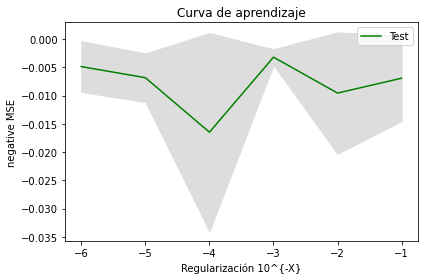

In [12]:
import matplotlib.pyplot as plt

# Dibujamos la línea de la exactitud media en las partes de test
plt.plot(np.log10(regul_param_range), cv_scores_mean, color="g", label="Test")

# Dibujamos la banda de la desviación típica
lower_limit = np.array(cv_scores_mean) - np.array(cv_scores_std)
upper_limit = np.array(cv_scores_mean) + np.array(cv_scores_std)
plt.fill_between(np.log10(regul_param_range), lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Regularización 10^{-X}"), plt.ylabel("negative MSE"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

En este caso observamos un carácter más inestable para este parámetro en cuanto al error medio. En cuanto a la desviación típica observamos que hay grandes variaciones en los diferentes valores del parámetro, siendo especialmente visible en 𝛼=10−4. Esto hace que esta red tenga un comportamiento más volatil ya que por ejemplo en ese 𝛼 el error puede ser desde 0 a -0.035. Parece que el mejor valor (el más cercano a cero y que más minimiza el MSE) es con 𝛼=10−4. 

Si comparamos las gráficas de ambas redes, podemos comprobar que el error medio para los distintos valores de 𝛼 es considerablemente menor (alrededor de -0.0006) para la red neuronal de 250 neuronas en una capa mientras que la otra (250 neuronas en 5 capas de 50) el error es mayor. De hecho el error mínimo para esta sigue siendo peor que la media  en primero.

Concluimos que en este caso es mejor una red neuronal con una sola capa y más neuronas puesto que 250 son aparentemente suficientes para que aprenda y el error esté cerca de 0. Sin embargo en la red de 5 capas ocultas con menos neuronas, al tratarse los datos con un nivel de "abstracción" mayor la red no es capaz de relacionar con tanta precisión el conjunto de datos siendo el error mayor.
Por tanto, elegimos para este problema la primera red con 𝛼=10−3.

### 5) Medición y análisis del error

Elige la mejor configuración del apartado anterior y usa la función `cross_val_predict` para realizar una predicción de la calidad de todos los vinos usando validación cruzada. 

A continuación:
- Muestra varias medidas de error y razona sobre si el error te parece pequeño o no para el problema que estás analizando
- Muestra el histograma de la distribución del error o del error en valor absoluto, y razona de nuevo si te parece que el modelo ha predicho bien o no. Identifica los vinos para los cuales el modelo ha fallado más.
- Analiza el error cometido para los vinos según su puntuación de calidad observada (3, 4, etc). Para ello, dibuja un diagrama de dispersión con los valores predichos por el modelo y los valores reales (la diagonal representa error 0). Describe lo que sucede, explica por qué crees que sucedió y razona de nuevo si te parece que el modelo funciona bien o tiene limitaciones.

In [13]:
from sklearn.model_selection import cross_val_predict
    
mlp = MLPRegressor(hidden_layer_sizes=(250, ), activation='relu', solver='adam', alpha=0.00001, batch_size=100, 
             learning_rate='constant', learning_rate_init=0.001, max_iter=500, random_state=333)

# estimamos 
predicts_scaled = cross_val_predict(mlp, df_nuevo[['volatile acidity_s', 'citric acid_s', 'total sulfur dioxide_s', 'density_s','sulphates_s','alcohol_s']], df_nuevo['quality'], cv=10)

In [14]:
predicts_scaled

array([5.04326752, 5.13609643, 5.27460753, ..., 6.20025111, 5.73470174,
       6.16100657])

In [15]:
errors = np.abs(df_nuevo.quality - predicts_scaled) # error en cada ejemplo
mean_error = np.mean(errors)
std_error = np.std(errors)
mean_price = np.mean(df_nuevo['quality'])

print('Error medio:', mean_error)
print('Desviación típica:', std_error)
print('Error medio en %:', mean_error/mean_price*100)

Error medio: 0.5008361048394767
Desviación típica: 0.4083397840072895
Error medio en %: 8.886339676412819


Nuestro modelo comete un error medio de 0.5 con una desviación típica muy grande. Que la desciación típica sea tan grande hace que tengamos errores altos que en nuestro modelo significa que confunde la calidad del vino. Seguramente un error medio del 8.8% no es muy buen resultado. Analizamos utilizando una gráfica

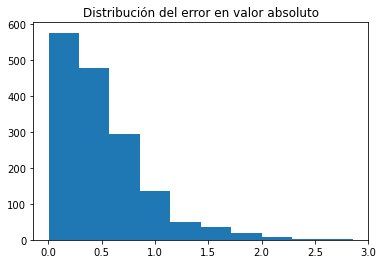

In [16]:
# Dibujamos el histograma de los errores
fig1 = plt.figure()
ax1 = plt.axes()
ax1.hist(errors)

plt.title('Distribución del error en valor absoluto')
plt.show()

Aunque la mayor parte de los errores se concentran en la parte izquierda de la gráfica, también hay algunos errores demasiado elevados que no son deseables. Un error de 1.0 en este caso es muy elevado pues confunde la calidad del vino con uno superior o uno menor, y un error de 2.0, 2.5 es demasiado elevado para lo que queremos en nuestro modelo aunque no hay muchos casos en los que ocura.

Vamos a dibujar la distancia entre el valor predicho por el modelo y el valor real en una gráfica. La diagonal representa error 0.

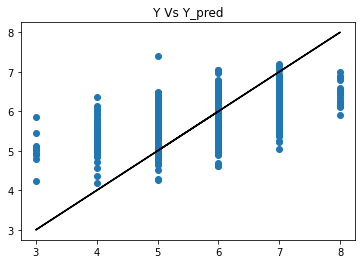

In [20]:
fig2 = plt.figure()
ax2 = plt.axes()

# dibujamos los errores: la distancia a la recta indica el nivel de error
ax2.scatter(df_nuevo['quality'], predicts_scaled) 
# Pintamos la referencia de la predicción perfecta
ax2.plot(df_nuevo['quality'], df_nuevo['quality'], color='k') 

plt.title('Y Vs Y_pred')
plt.show()

Observamos que los vinos de calidad 3 y 8 no se predicen correctamente pues están muy lejos de la diagonal (que representa error 0) por lo que nuestro modelo confunde los vinos de calidad alta con vinos de más baja calidad y los de baja con los de alta. Los vinos de calidad media síi que se consiguen clasificar y se observa que los resultados están alrededor de la diagonal.